# Car Resale Price Prediction

## Project done by : Jaitashri Poddar

## Project Description

The model ceated in this project predicts the price of used cars. The dataset used to build the model consists of various information related to used cars such as year of purchase, how many owners it had before etc. The model performing the best has been saved for deployment.

## Data Definition

**name:** Name (brand and model name) of the cars.

**year:** Year in which the car was bought.

**km_driven:** Number of kilometers the car has been driven.

**fuel:** Fuel type of the car (Petrol / Diesel / CNG / LPG / Electric).

**seller_type:** Tells if the car is sold by Individual or Dealer.

**transmission:** Gear transmission of the car (Automatic/Manual).

**owner:** Number of previous owners the car had.

**selling_price:** Price at which the car has been sold.



# 1. Importing Libraries and Setting Options

## 1.1 Importing Necessary LIbraries

In [97]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.formula.api import ols

# Importing DecisionTreeRegressor from sklearn
from sklearn.tree import DecisionTreeRegressor

# Importing RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Importing XGBRegressor from xgboost library
import xgboost as xgb
from xgboost import XGBRegressor

# Importing necessary libraries for GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# import pickle to save the model
import pickle

## 1.2 Setting Figure Size

In [98]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## 1.3 Setting Options

In [99]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)


# 2. Reading Data

In [100]:
#Let's name the dataset as df
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Ongoing_Projects/Car_Resale_Price_Prediction/car_details.csv')

In [101]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [102]:
df.shape

(4340, 8)

So the dataset has 4340 rows and 8 columns (features).

# 3. Data Analysis 

## 3.1 Understanding the Dataset

Let us have a glance on the dataset.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


We see that the dataset consists of int64 and object data types.

In [104]:
# 'dtypes' gives the data type for each column
data_type_and_unique = pd.concat([df.dtypes, df.nunique()], axis = 1, keys = ['Data Types', 'Number of unique Values'])
data_type_and_unique

,Data Types,Number of unique Values
name,object,1491
year,int64,27
selling_price,int64,445
km_driven,int64,770
fuel,object,5
seller_type,object,3
transmission,object,2
owner,object,5


We have 7 independent features, and selling_price is the dependent/target variable. By observing the number of unique values in each feature, it seems that all the features are in correct format.

## 3.2 Data Correction

**Now let us go through all the features one by one, and make the necessary modification.**

### name

In [105]:
df['name'].dtype

dtype('O')

In [106]:
df['name'].nunique()

1491

In [107]:
df['name'].head()

0               Maruti 800 AC
1    Maruti Wagon R LXI Minor
2        Hyundai Verna 1.6 SX
3      Datsun RediGO T Option
4       Honda Amaze VX i-DTEC
Name: name, dtype: object

Despite being a categorical feature, the feature **name** has 1491 unique values, which might make the model complex. Hence it's better to extract the car brand names only, and drop the model name part.

In [108]:
# split() with expand=True yields one column per list element
# we only split on the first space by setting n=1
df[["car_brand", "car_model"]] = df["name"].str.split(" ", n=1, expand=True)
df.drop("name", axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand,car_model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


The column car_brand contains the car brand names, and car_model contains the model namse of the cars.

In [109]:
df['car_brand'].nunique()

29

There are total 29 variants of car brands in the dataset.

In [110]:
df['car_brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [111]:
df['car_brand'] = df['car_brand'].replace('Mercedes-Benz', 'Mercedes_Benz')

In [112]:
df['car_model'].nunique()

1491

We drop the feature **car_model** to reduce the complexity of the model.

In [113]:
df.drop(['car_model'], axis=1, inplace=True)

### year

In [114]:
df['year'].dtype

dtype('int64')

In [115]:
df['year'].nunique()

27

## km_driven

In [116]:
df['km_driven'].dtype

dtype('int64')

In [117]:
df['km_driven'].nunique()

770

As km_driven can take floating values, it's better to convert it to float type.

In [118]:
df['km_driven'] = df['km_driven'].astype('float64')

In [119]:
df.shape

(4340, 8)

After omitting the outlier values from km_driven column, the dataset has 4329 rows.

## fuel

In [120]:
df['fuel'].dtype

dtype('O')

In [121]:
df['fuel'].nunique()

5

In [122]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

## seller_type

In [123]:
df['seller_type'].dtype

dtype('O')

In [124]:
df['seller_type'].nunique()

3

In [125]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [126]:
# replace 'Trustmark Dealer' with Trustmark_Dealer
df['seller_type'] = df['seller_type'].replace('Trustmark Dealer', 'Trustmark_Dealer')

In [127]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark_Dealer     102
Name: seller_type, dtype: int64

### transmission

In [128]:
df['transmission'].dtype

dtype('O')

In [129]:
df['transmission'].nunique()

2

In [130]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

## owner

In [131]:
df['owner'].dtype

dtype('O')

In [132]:
df['owner'].nunique()

5

In [133]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [134]:
# Rename the classes 
df['owner'] = df['owner'].replace('First Owner', 'First_Owner')
df['owner'] = df['owner'].replace('Second Owner', 'Second_Owner')
df['owner'] = df['owner'].replace('Fourth & Above Owner', 'Fourth_and_Above_Owner')
df['owner'] = df['owner'].replace('Third Owner', 'Third_Owner')
df['owner'] = df['owner'].replace('Test Drive Car', 'Test_Drive_Car')

In [135]:
df['owner'].value_counts()

First_Owner               2832
Second_Owner              1106
Third_Owner                304
Fourth_and_Above_Owner      81
Test_Drive_Car              17
Name: owner, dtype: int64

## selling_price (Target Variable)

In [136]:
df['selling_price'].dtype

dtype('int64')

So the target variable is of numerical data type.

## 3.3. Summary Statistics

### 3.3.1 Summary Statistics of Numerical Variables

In [137]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.
<br><br>
    Let us consider the 'km_driven' variable to see the statistics- <br>
This varable ranges from 1 km to 82 years, with mean around 43 years. 25% of total atients are under age 25, 50% are under 45, and 75% are under 61. <br>

The variable bmi has count less than total number of observations which indicates the presence of missing values. We deal with the missing data in upcoming sections.

### 3.3.2 Summary Statistics of Categorical Variables

In [138]:
df.describe(include=object)

,fuel,seller_type,transmission,owner,car_brand
count,4340,4340,4340,4340,4340
unique,5,3,2,5,29
top,Diesel,Individual,Manual,First_Owner,Maruti
freq,2153,3244,3892,2832,1280


## 3.4 Splitting Numerical and Categoric Features

### 3.4.1 Filtering Numerical Variables

In [139]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

df_numeric_features.columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

### 3.4.2 Filtering Categoric Variables

In [140]:
# filter the categoric features in the dataset using select_dtypes()
# include=object: selects the caegoric features

df_categorical_features = df.select_dtypes(include = object)

df_categorical_features.columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], dtype='object')

## 3.5 Univariate Analysis

Let us visualize the distribution of all the features.

### 3.5.1 Univariate Analysis of Numerical Features

We perform the univariate analysis of the numerical features using histogram.

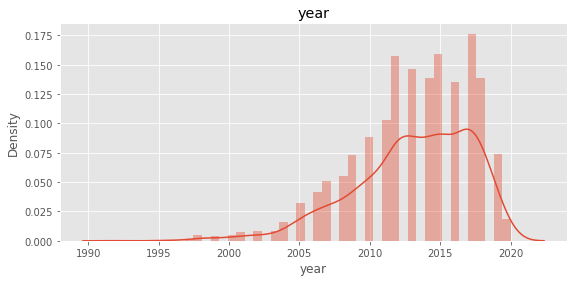

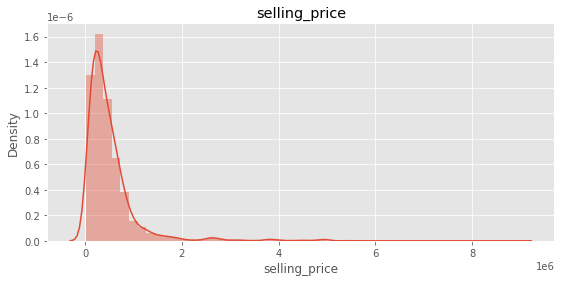

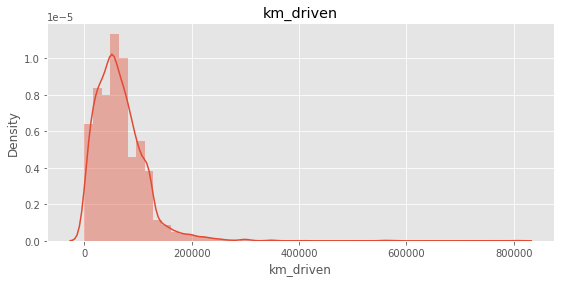

In [141]:
plt.style.use('ggplot')
for column in df_numeric_features:
    #Considering only the independent numerical variables
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

It seems like all the numerical features consists of outlier values. We omit the outlier values (if any) in the numerical features in the upcoming sections.

### 3.5.2 Univariate Analysis of Categorical Features

We perform the univariate analysis of the categorical features using count plot.

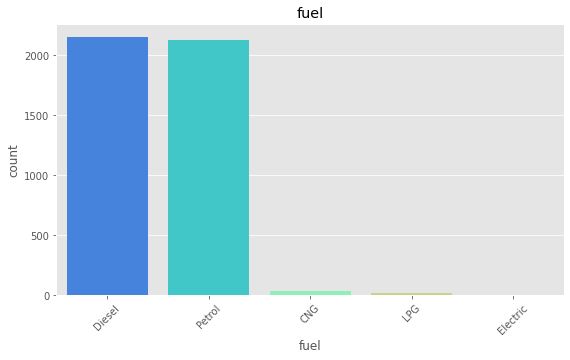

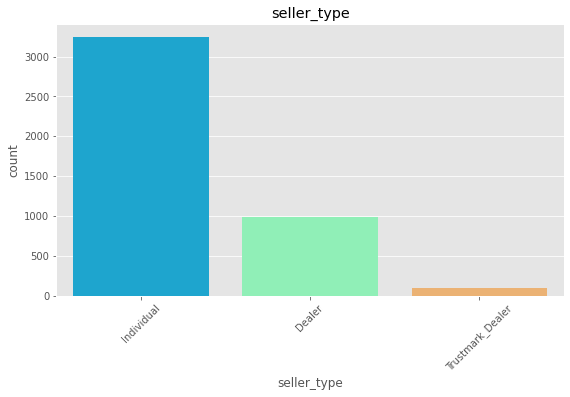

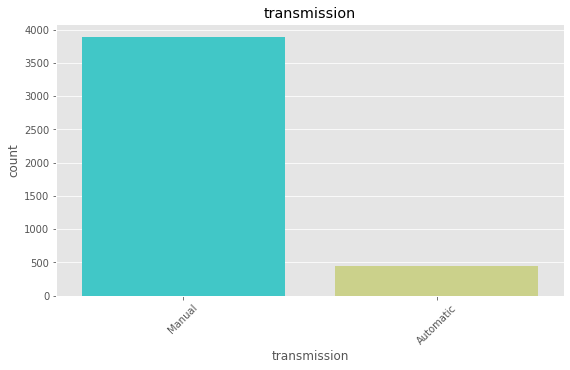

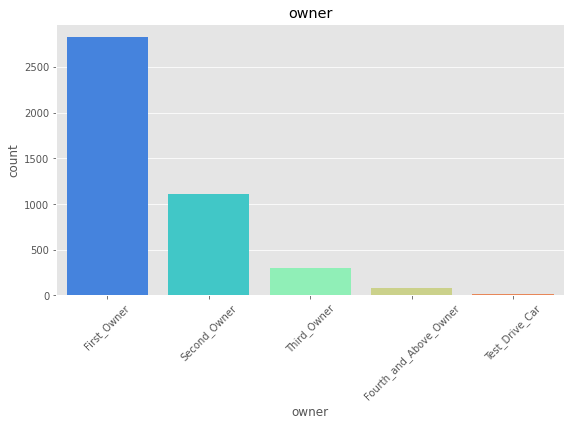

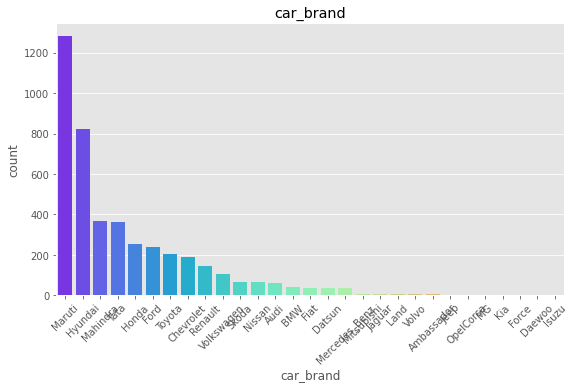

In [142]:
for column in df_categorical_features:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.countplot(x = column, data = df, order = df[column].value_counts().index, palette='rainbow')
  plt.xticks(rotation=45)
  plt.title(column)

From the univariate analysis of categorical features, we can conclude the following features about different variables: <br>

**fuel** : Fuel type of most of the cars are diesel, followed by petrol. <br>
**seller_type** : Most of the cars are sold by individuals. <br>
**transmission** : Gear transmission type of most of the cars are manual. <br>
**owner** : Most of the cars had only one owner before, fllowed by two owners. <br>
**car_brand** : Most of the cars are of Maruti brand, followed by Hyundai and Mahindra. <br>

## 3.6 Multivariate Analysis

### 3.6.1 Bivariate Analysis between Numerical Variables and Target Variable

We perform the analysis using joint plot between numeric variables and target variable.

**Joint plot between selling_price and year**

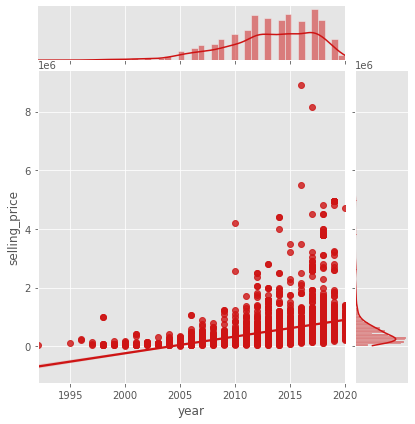

In [143]:
x = df[['selling_price','year']]
sns.jointplot(x.loc[:,'year'], x.loc[:,'selling_price'], kind="reg", color="#ce1414")


There seems to be a positive trend, i.e. newer the car, higher the selling price.

**Joint plot between selling_price and km_driven**

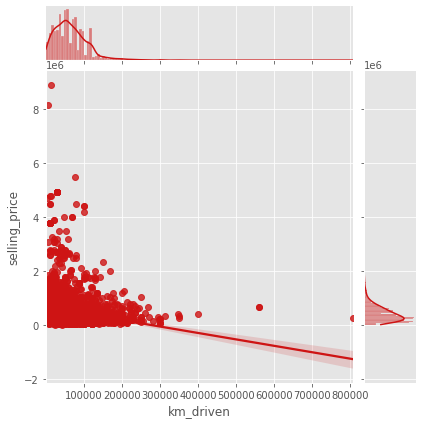

In [144]:
x = df[['selling_price','km_driven']]
sns.jointplot(x.loc[:,'km_driven'], x.loc[:,'selling_price'], kind="reg", color="#ce1414")


There is a slight indication that more the car has been driven, less its sellng price is.

### 3.6.2 Bivariate Analysis between Categoric Variables and Target Variable


We perform the analysis using box plot between numeric variables and target variable.


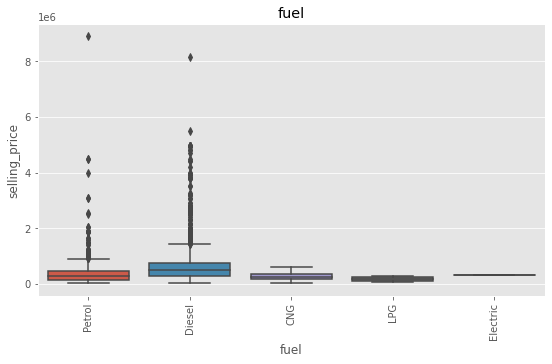

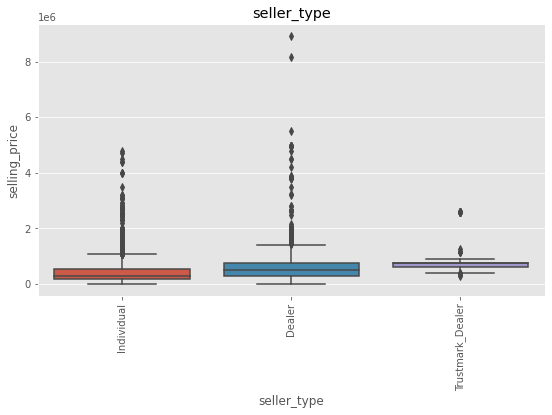

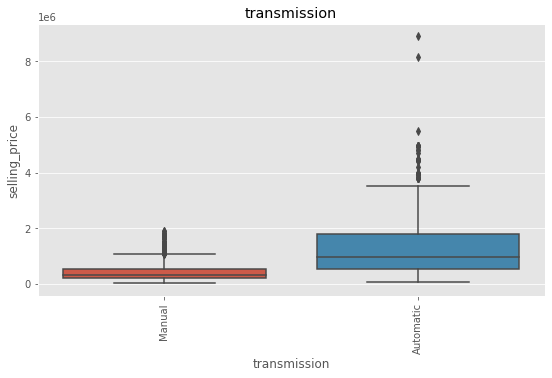

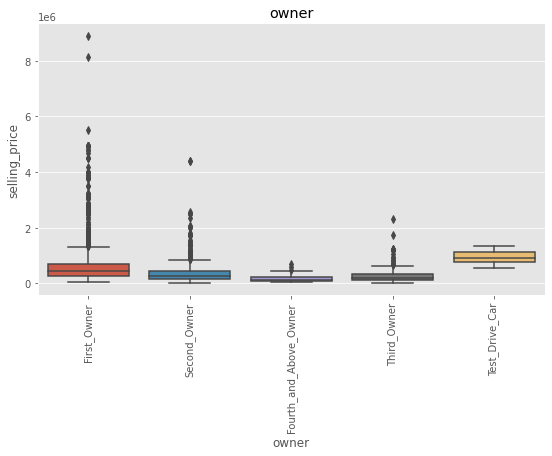

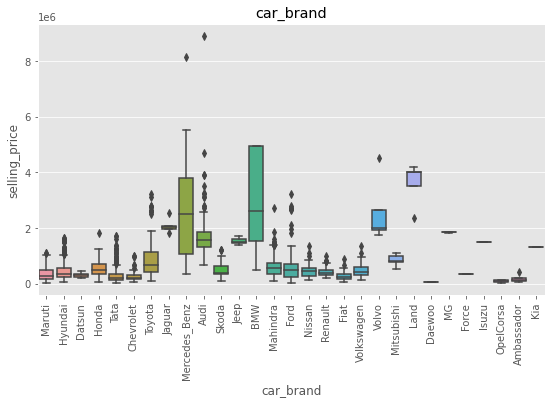

In [145]:
for column in df_categorical_features:
  #Considering only the independent numerical variables
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  #sns.boxplot(x=df[column],hue=df['stroke'],data=df)
  sns.boxplot(data=df, x=df[column], y=df['selling_price'])
  plt.title(column)
  plt.xticks(rotation=90)

By observing the bivariate analysis between various categorical features and target variables, the following points can be inferred:
* **fuel:** Highest average selling price is for cars having diesel fuel type.
* **seller_type:** Highest average selling price is for cars bought from trustmark dealers.
* **transmssion:** Autometic gear transmission cars have higher average selling price.
* **owner:** Cars used as test drive cars have highest average selling price. However, few cars having only ne owner before were sold for a very high price.
* **car_brand:** BMW cars had highest average selling price, followed by Mercedes Benz. Few Audi cars were also sold at very high price.  

### 3.6.3 Pair Plot between Numerical Variables

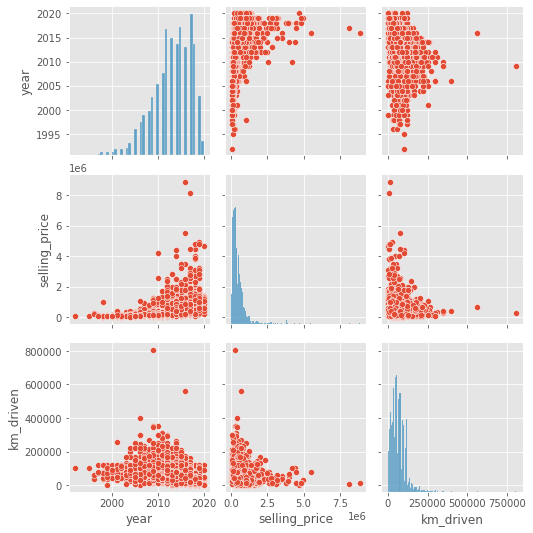

In [146]:
y = df_numeric_features.selling_price
X = df_numeric_features.drop('selling_price', axis=1)
pp = sns.pairplot(df_numeric_features,palette="bright")

## 3.7 Handling Missing Values

### 3.7.1 Checking Missing Values

In [147]:
# Generating list of missing values feature wise
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first

Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
car_brand,0,0.0,object
owner,0,0.0,object
transmission,0,0.0,object
seller_type,0,0.0,object
fuel,0,0.0,object
km_driven,0,0.0,float64
selling_price,0,0.0,int64
year,0,0.0,int64


### 3.7.2 Checking Missing Values using Heat Map

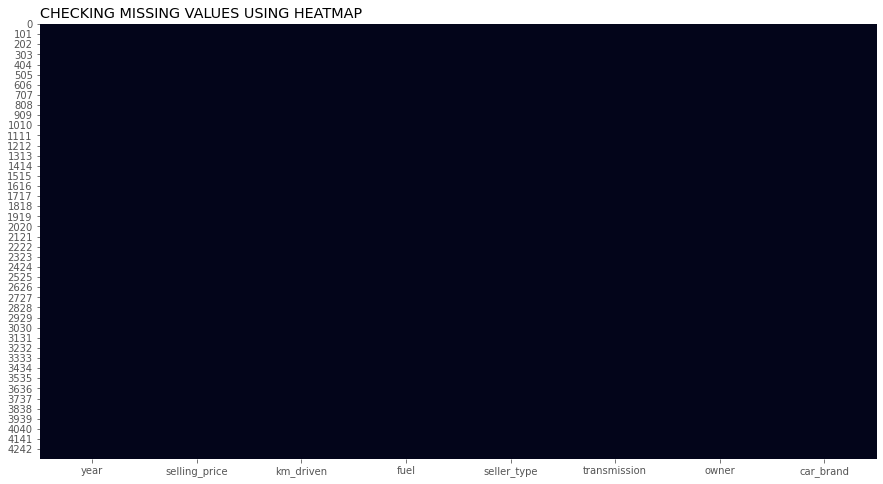

In [148]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# Title for heatmap
title = 'Checking Missing Values Using Heatmap'.upper()
plt.title(title, loc='left')

# display the plot
plt.show()

**We see there are no missing values in the dataset. Hence there is no need of handling of missing values.**

# 4. Data Preparation

### 4.1 Handling Outliers in Numerical Variables

### 4.1.1 Handling Outliers in 'km_driven'

Let us check if there are any outliers in km_driven feature.

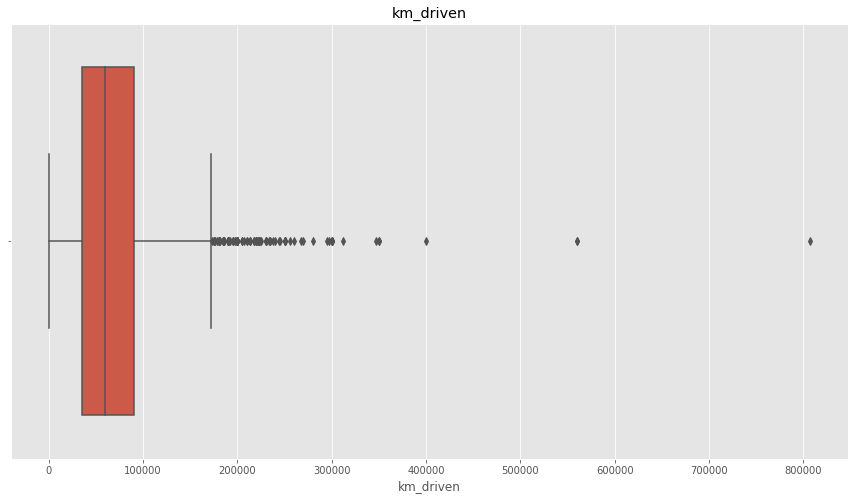

In [149]:
sns.boxplot(df['km_driven'])
plt.title('km_driven')
plt.show()

**We see that there are few outlier values. To omit the outlier values, let's omit the values of km_driven less than 400000.**

In [150]:
df = df[df['km_driven']<400000]

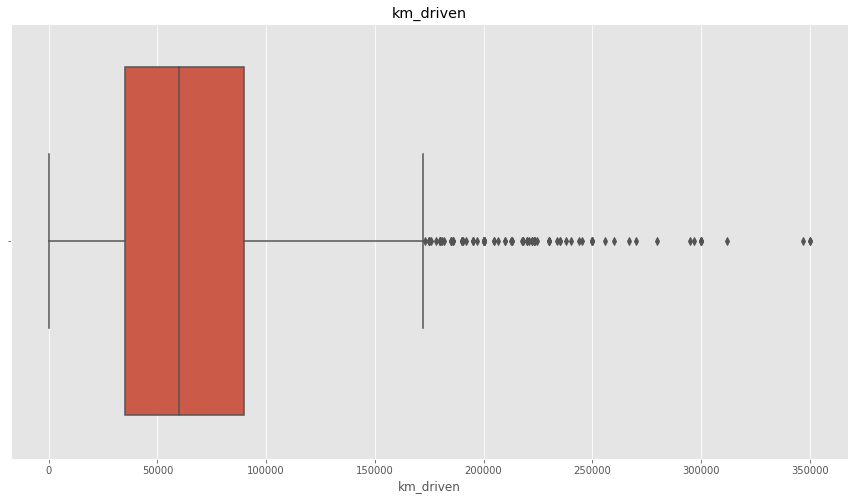

In [151]:
sns.boxplot(df['km_driven'])
plt.title('km_driven')
plt.show()

We see that few outlier values in km_driven column has been omitted.

### 4.1.2 Handling Outliers in 'year'

Let us check if there are any outliers in this feature.

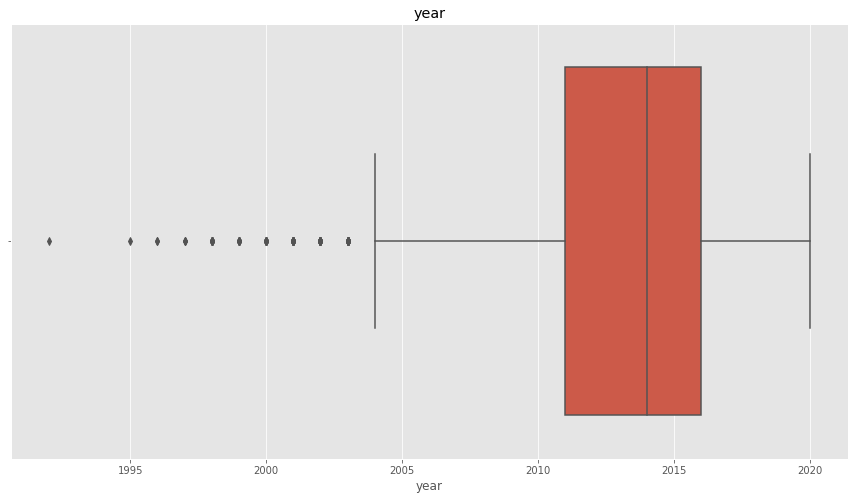

In [152]:
sns.boxplot(df['year'])
plt.title('year')
plt.show()

**We see that there are few outlier values.To omit the outlier values, let's omit the years previous than 1997.**

In [153]:
df = df[df['year']>1997]

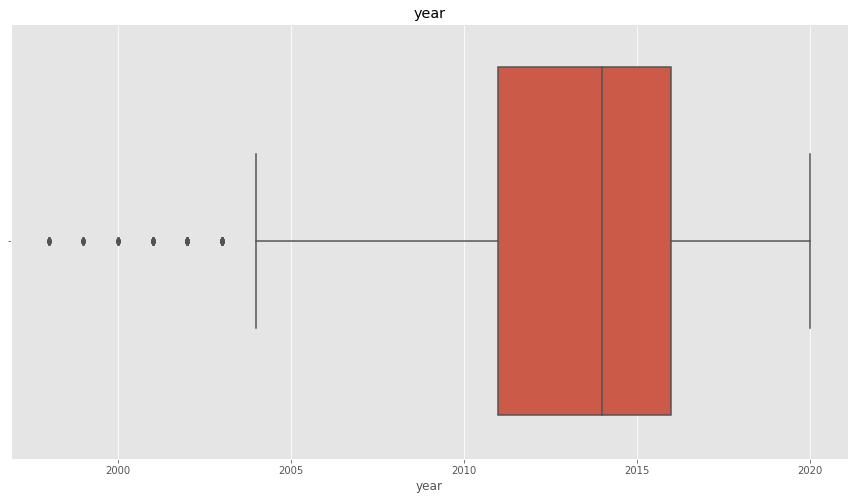

In [154]:
sns.boxplot(df['year'])
plt.title('year')
plt.show()

We see that few outlier values has been omitted.

### 4.1.3 Handling Outliers in 'selling_price' (Target Variable)

Let us check if there are any outliers in this feature.

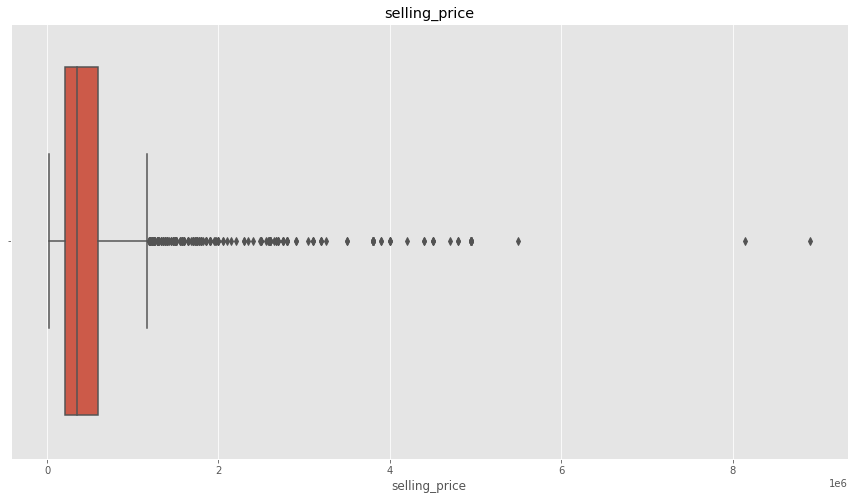

In [155]:
sns.boxplot(df['selling_price'])
plt.title('selling_price')
plt.show()

**We see that there are few outlier values. To omit the outlier values, let's omit the selling prices more than 6000000.**

In [156]:
df = df[df['selling_price']<6000000]

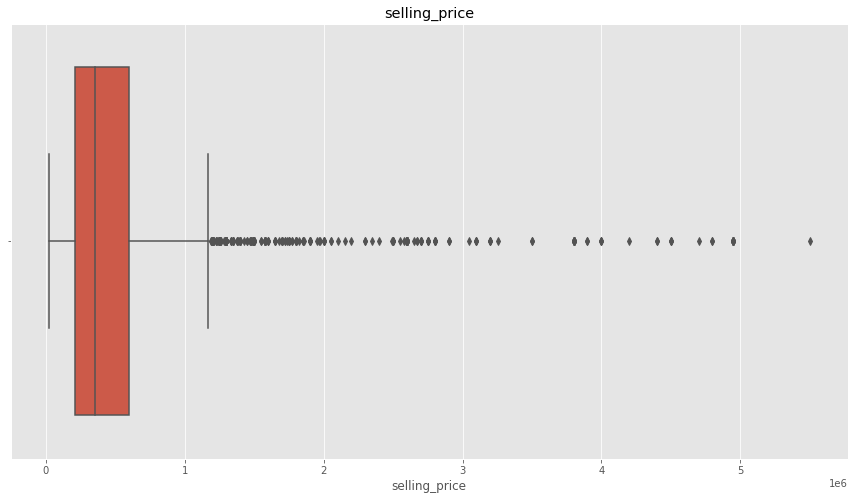

In [157]:
sns.boxplot(df['selling_price'])
plt.title('selling_price')
plt.show()

We see that extreme values has been omitted.

In [158]:
df.shape

(4327, 8)

After omitting the outlier values from different numeric features, the dataset has 4327 rows.

## 4.2 Checking Normality of Target Variable

Text(0.5, 0, 'Distribution of Selling Price')

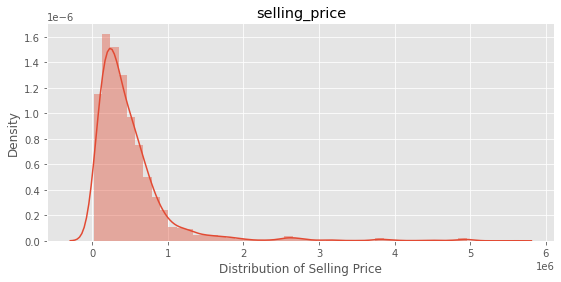

In [159]:
#Checking normality using histogram
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df['selling_price'])
plt.title('selling_price')
plt.xlabel('Distribution of Selling Price')

In [160]:
#Checking normality by checking skewness
print('Skewness Value:', df['selling_price'].skew())

Skewness Value: 4.219005936660604


By observing histogram and skewness value both, we see that the distribution of the target variable is positively skewed. So we apply log transformation to the target variable to get near normally distributed data.

In [161]:
# log transformation for normality using np.log()
df['log_selling_price'] = np.log(df['selling_price'])

# display first 5 rows of the data
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand,log_selling_price
0,2007,60000,70000.0,Petrol,Individual,Manual,First_Owner,Maruti,11.002100
1,2007,135000,50000.0,Petrol,Individual,Manual,First_Owner,Maruti,11.813030
2,2012,600000,100000.0,Diesel,Individual,Manual,First_Owner,Hyundai,13.304685
3,2017,250000,46000.0,Petrol,Individual,Manual,First_Owner,Datsun,12.429216
4,2014,450000,141000.0,Diesel,Individual,Manual,Second_Owner,Honda,13.017003


A new column named 'log_selling_price' has been added, which consists of log transformed values of selling prices.

Let's check the normality of **log_selling_price**

Text(0.5, 0, 'Distribution of log of Selling Price')

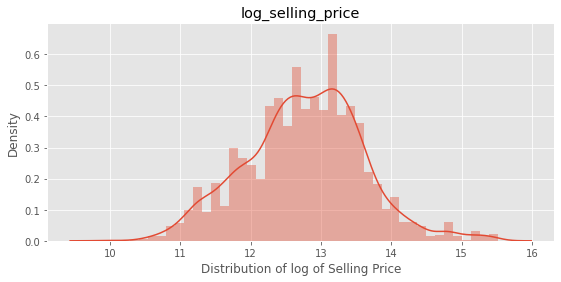

In [162]:
#Checking normality using histogram
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df['log_selling_price'])
plt.title('log_selling_price')
plt.xlabel('Distribution of log of Selling Price')

In [163]:
#Checking normality by checking skewness
print('Skewness Value:', df['log_selling_price'].skew())

Skewness Value: 0.042623267190346786


So we see that the skewness has been significantly reduced.

## 4.3 Creating Various Necessary Generalized Functions 

### 4.3.1 Creating Generalized Function to Tabulate Accuracy Scores

In [164]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

In [165]:
# append the result table for all performance scores
# compile the required information in a user defined function 
def update_result_tabulation(model,model_name,mae,mse,rmse,r_sq):
    # assign 'score_card' as global variable
    global result_tabulation

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    result_tabulation = result_tabulation.append({'Model': model_name,
                                    'MAE': mae,
                                    'MSE': mse,              
                                    'RMSE':rmse,
                                    'R-Squared': r_sq}, 
                                    ignore_index = True)
    return(result_tabulation)

## 4.3 Dummy Encoding of Categorical Features

In [166]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['year', 'selling_price', 'km_driven', 'log_selling_price'], dtype='object')

In [167]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], dtype='object')

In [168]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categorical_features, drop_first = True)

## 4.4 Concatenating Numerical and Dummy Encoded Categorical Features

In [169]:
#CONCAT THE NUMERICAL AND DUMMY ENCODED CATEGORICAL VARIABLES
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)
df_dummy.dropna(inplace=True)

In [170]:
df_dummy.head()

,year,selling_price,km_driven,log_selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_and_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,car_brand_Audi,car_brand_BMW,car_brand_Chevrolet,car_brand_Daewoo,car_brand_Datsun,car_brand_Fiat,car_brand_Force,car_brand_Ford,car_brand_Honda,car_brand_Hyundai,car_brand_Isuzu,car_brand_Jaguar,car_brand_Jeep,car_brand_Kia,car_brand_Land,car_brand_MG,car_brand_Mahindra,car_brand_Maruti,car_brand_Mercedes_Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,2007.0,60000.0,70000.0,11.002100,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2007.0,135000.0,50000.0,11.813030,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2012.0,600000.0,100000.0,13.304685,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017.0,250000.0,46000.0,12.429216,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014.0,450000.0,141000.0,13.017003,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
df_dummy.shape

(4327, 43)

After dummy encoding of categorical variables, the created dataset has 4329 rows and 43 columns.

## 4.5 Extracting Predictor and Tareget Variables

In [172]:
#EXTRACT THE PREDICTOR VARIABLES
X = df_dummy.iloc[:, (df_dummy.columns != 'selling_price') & (df_dummy.columns != 'log_selling_price')]
print("The Predictor Variables are:\n",X.columns)

The Predictor Variables are:
 Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark_Dealer',
       'transmission_Manual', 'owner_Fourth_and_Above_Owner',
       'owner_Second_Owner', 'owner_Test_Drive_Car', 'owner_Third_Owner',
       'car_brand_Audi', 'car_brand_BMW', 'car_brand_Chevrolet',
       'car_brand_Daewoo', 'car_brand_Datsun', 'car_brand_Fiat',
       'car_brand_Force', 'car_brand_Ford', 'car_brand_Honda',
       'car_brand_Hyundai', 'car_brand_Isuzu', 'car_brand_Jaguar',
       'car_brand_Jeep', 'car_brand_Kia', 'car_brand_Land', 'car_brand_MG',
       'car_brand_Mahindra', 'car_brand_Maruti', 'car_brand_Mercedes_Benz',
       'car_brand_Mitsubishi', 'car_brand_Nissan', 'car_brand_OpelCorsa',
       'car_brand_Renault', 'car_brand_Skoda', 'car_brand_Tata',
       'car_brand_Toyota', 'car_brand_Volkswagen', 'car_brand_Volvo'],
      dtype='object')


In [173]:
#EXTRACT THE TARGET VARIABLES
y = df_dummy[['selling_price','log_selling_price']]
#y is the Target Variable
print("The Target Variables are:\n",y.columns)

The Target Variables are:
 Index(['selling_price', 'log_selling_price'], dtype='object')


## 4.6 Splitting Training and Testing Data for OLS Models

For OLS models, we need to add a constant term with the independent variables (X).

In [174]:
#Take a copy of X and y to use in OLS Models
X_ols = X.copy(deep=True)
y_ols = y.copy(deep=True)

In [175]:
# add the intercept column using 'add_constant()'
X_ols = sm.add_constant(X_ols)

In [176]:
#SPLIT DATA INTO TRAIN AND TEST SUBSET FOR PREDICTOR AND TARGET VARIABLES

X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y_ols, test_size = 0.2, random_state = 1)
# print dimension of predictors train set
print("The shape of X_train_ols is:",X_train_ols.shape)
# print dimension of predictors test set
print("The shape of X_test_ols is:",X_test_ols.shape)
# print dimension of target train set
print("The shape of y_train_ols is:",y_train_ols.shape)
# print dimension of target test set
print("The shape of y_test_ols is:",y_test_ols.shape)

The shape of X_train_ols is: (3461, 42)
The shape of X_test_ols is: (866, 42)
The shape of y_train_ols is: (3461, 2)
The shape of y_test_ols is: (866, 2)


In [177]:
X_train_ols = X_train_ols.values
X_test_ols = X_test_ols.values
log_y_train_ols = y_train_ols['log_selling_price'].values
log_y_test_ols = y_test_ols['log_selling_price'].values
y_train_ols = y_train_ols['selling_price'].values
y_test_ols = y_test_ols['selling_price'].values

## 4.7 Splitting Training and Testing Data for Models other than OLS

For models other than OLS, we don't have to add the intercept term.

In [178]:
#SPLIT DATA INTO TRAIN AND TEST SUBSET FOR PREDICTOR AND TARGET VARIABLES
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (3461, 41)
The shape of X_test is: (866, 41)
The shape of y_train is: (3461, 2)
The shape of y_test is: (866, 2)


In [179]:
X_train = X_train.values
X_test = X_test.values
y_train_log = y_train['log_selling_price'].values
y_test_log  = y_test['log_selling_price'].values
y_train = y_train['selling_price'].values
y_test = y_test['selling_price'].values

# 5. Building Models

## 5.1 Linear Regression without Log of Target Variable

In [180]:
# Building Model
linreg_wo_log = sm.OLS(y_train_ols,X_train_ols).fit()

In [181]:
#Predicting target variable using predict
predicted_y = linreg_wo_log.predict(X_test_ols)

# extract the 'selling_price' values from the test data
actual_y = y_test_ols

In [182]:
# Calculate Accuracy Measures

#Calculate MAE
linreg_wo_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
linreg_wo_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
linreg_wo_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
linreg_wo_log_r_sq = linreg_wo_log.rsquared

In [183]:
#Tabulate the results
update_result_tabulation(linreg_wo_log_rmse,'OLS without Log',linreg_wo_log_mae,linreg_wo_log_mse,linreg_wo_log_rmse,linreg_wo_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.17319,0.716784


## 5.2 Linear Regression with Log of Target Variable

In [184]:
# Building Model
linreg_with_log = sm.OLS(log_y_train_ols,X_train_ols).fit()

In [185]:
#Predicting target variable using predict
log_predicted_y = linreg_with_log.predict(X_test_ols)

# Take the exponential of predictions using np.exp()
predicted_y = np.exp(log_predicted_y)

# extract the 'selling_price' values from the test data
actual_y = y_test_ols

In [186]:
# Calculate Accuracy Measures

#Calculate MAE
linreg_with_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
linreg_with_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
linreg_with_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
linreg_with_log_r_sq = linreg_with_log.rsquared

In [187]:
#Tabulate the results
update_result_tabulation(linreg_with_log,'OLS with Log',linreg_with_log_mae,linreg_with_log_mse,linreg_with_log_rmse,linreg_with_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777


## 5.3 Decesion Tree Regression without log of Target Variable

In [188]:
#Build the model
DT_wo_log = DecisionTreeRegressor(random_state=0)
#Fit the data
DT_wo_log.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [189]:
#Predicting target variable using predict
predicted_y = DT_wo_log.predict(X_test)

# extract the actual values from the test data
actual_y = y_test

In [190]:
# Calculate Accuracy Measures

#Calculate MAE
DT_wo_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
DT_wo_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
DT_wo_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
DT_wo_log_r_sq = r2_score(actual_y,predicted_y)

In [191]:
update_result_tabulation(DT_wo_log,
                         'DT without Log',
                         DT_wo_log_mae,
                         DT_wo_log_mse,
                         DT_wo_log_rmse,
                         DT_wo_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898


## 5.4 Decesion Tree Regression with log of Target Variable

In [192]:
#Build the model
DT_with_log = DecisionTreeRegressor(random_state=0)
#Fit the data
DT_with_log.fit(X_train,y_train_log)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [193]:
#Predicting target variable using predict
log_predicted_y = DT_with_log.predict(X_test)

# Take the exponential of predictions using np.exp()
predicted_y = np.exp(log_predicted_y)

# extract the actual values from the test data
actual_y = y_test

In [194]:
# Calculate Accuracy Measures

#Calculate MAE
DT_with_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
DT_with_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
DT_with_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
DT_with_log_r_sq = r2_score(actual_y,predicted_y)

In [195]:
update_result_tabulation(DT_with_log,
                         'DT with Log',
                         DT_with_log_mae,
                         DT_with_log_mse,
                         DT_with_log_rmse,
                         DT_with_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188


## 5.5 Random Forest Regressor without log of Target Variable

In [196]:

#Build the model
RF_wo_log = RandomForestRegressor(n_estimators=50, random_state=10)
#Fit the data
RF_wo_log.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [197]:
#Predicting target variable using predict
predicted_y = RF_wo_log.predict(X_test)

# extract the actual values from the test data
actual_y = y_test

In [198]:
# Calculate Accuracy Measures

#Calculate MAE
RF_wo_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
RF_wo_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
RF_wo_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
RF_wo_log_r_sq = r2_score(actual_y,predicted_y)

In [199]:
# Tabulate the results
update_result_tabulation(RF_wo_log,
                         'RF without Log',
                         RF_wo_log_mae,
                         RF_wo_log_mse,
                         RF_wo_log_rmse,
                         RF_wo_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188
4,RF without Log,112121.852675,3.815240e+10,195326.403570,0.861815


## 5.6 Random Forest Regressor with log of Target Variable

In [200]:
#Build the model
RF_with_log = RandomForestRegressor(n_estimators=50, random_state=10)
#Fit the data
RF_with_log.fit(X_train,y_train_log)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [201]:
#Predicting target variable using predict
log_predicted_y = RF_with_log.predict(X_test)

# Take the exponential of predictions using np.exp()
predicted_y = np.exp(log_predicted_y)

# extract the actual values from the test data
actual_y = y_test

In [202]:
# Calculate Accuracy Measures

#Calculate MAE
RF_with_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
RF_with_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
RF_with_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
RF_with_log_r_sq = r2_score(actual_y,predicted_y)

In [203]:
# Tabulate the results
update_result_tabulation(RF_with_log,
                         'RF with Log',
                         RF_with_log_mae,
                         RF_with_log_mse,
                         RF_with_log_rmse,
                         RF_with_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188
4,RF without Log,112121.852675,3.815240e+10,195326.403570,0.861815
5,RF with Log,113844.866797,4.513236e+10,212443.769051,0.836534


## 5.7 XGBoost Regressor without log of Target Variable

In [204]:
#Building the model
xgbr_wo_log = xgb.XGBRegressor(verbosity=0) 

# Fitting the training data
xgbr_wo_log.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [205]:
#Predicting target variable using predict
predicted_y = xgbr_wo_log.predict(X_test)

# extract the actual values from the test data
actual_y = y_test

In [206]:
#Calculate MAE
xgbr_wo_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
xgbr_wo_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
xgbr_wo_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
xgbr_wo_log_r_sq = r2_score(actual_y,predicted_y)

In [207]:
# Tabulate the results
update_result_tabulation(xgbr_wo_log,
                         'XGB without Log',
                         xgbr_wo_log_mae,
                         xgbr_wo_log_mse,
                         xgbr_wo_log_rmse,
                         xgbr_wo_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188
4,RF without Log,112121.852675,3.815240e+10,195326.403570,0.861815
5,RF with Log,113844.866797,4.513236e+10,212443.769051,0.836534
6,XGB without Log,144547.968064,5.867517e+10,242229.573626,0.787483


In [208]:
xgbr_wo_log.score(X_train,y_train)

0.8681101029116525

## 5.8 XGBoost Regressor with log of Target Variable

In [209]:
#Building the model
xgbr_with_log = xgb.XGBRegressor(verbosity=0) 

# Fitting the training data
xgbr_with_log.fit(X_train, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [210]:
#Predicting target variable using predict
log_predicted_y = xgbr_with_log.predict(X_test)

# Take the exponential of predictions using np.exp()
predicted_y = np.exp(log_predicted_y)

# extract the actual values from the test data
actual_y = y_test

In [211]:
# Calculate Accuracy Measures

#Calculate MAE
xgbr_with_log_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
xgbr_with_log_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
xgbr_with_log_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
xgbr_with_log_r_sq = r2_score(actual_y,predicted_y)

In [212]:
# Tabulate the results
update_result_tabulation(xgbr_with_log,
                         'XGB with Log',
                         xgbr_with_log_mae,
                         xgbr_with_log_mse,
                         xgbr_with_log_rmse,
                         xgbr_with_log_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188
4,RF without Log,112121.852675,3.815240e+10,195326.403570,0.861815
5,RF with Log,113844.866797,4.513236e+10,212443.769051,0.836534
6,XGB without Log,144547.968064,5.867517e+10,242229.573626,0.787483
7,XGB with Log,137005.863119,6.108141e+10,247146.541400,0.778768


## 5.9 Random Forest with GridSearchCV 

In [213]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 40, 50, 60],
                     'min_samples_split': [1,2,3],
                     'max_depth': [4,6,8, None],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15, None]
                    }]

In [214]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50} 



In [215]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
RF_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
RF_grid_model = RF_grid_model.fit(X_train, y_train)

In [216]:
#Predicting target variable using predict
predicted_y = RF_grid_model.predict(X_test)

# extract the actual values from the test data
actual_y = y_test

In [217]:
# Calculate Accuracy Measures

#Calculate MAE
RF_grid_model_mae = metrics.mean_absolute_error(actual_y,predicted_y)

#Calculate MSE
RF_grid_model_mse = metrics.mean_squared_error(actual_y,predicted_y)

#Calculate RMSE
RF_grid_model_rmse = rmse(actual_y,predicted_y)

#Calculate R Squared
RF_grid_model_r_sq = r2_score(actual_y,predicted_y)

In [218]:
# Tabulate the results
update_result_tabulation(RF_grid_model,
                         'RF with Grid Search',
                         RF_grid_model_mae,
                         RF_grid_model_mse,
                         RF_grid_model_rmse,
                         RF_grid_model_r_sq)

,Model,MAE,MSE,RMSE,R-Squared
0,OLS without Log,174776.666499,7.866464e+10,280472.173190,0.716784
1,OLS with Log,137254.912570,5.844127e+10,241746.299484,0.796777
2,DT without Log,117988.508303,5.110611e+10,226066.610038,0.814898
3,DT with Log,126852.359562,7.918782e+10,281403.304196,0.713188
4,RF without Log,112121.852675,3.815240e+10,195326.403570,0.861815
5,RF with Log,113844.866797,4.513236e+10,212443.769051,0.836534
6,XGB without Log,144547.968064,5.867517e+10,242229.573626,0.787483
7,XGB with Log,137005.863119,6.108141e+10,247146.541400,0.778768
8,RF with Grid Search,144622.894105,7.832098e+10,279858.862924,0.716327


# 6. Saving Model for Reuse

**After observing the comparison table, we see that we can achive best performance using Random Forest Regressor model with default values of different hyperparameters and without log of target variable. Hence we dump this model for further use.**

In [219]:
# Save to file in the current working directory
pkl_filename = "car_resale_price_prediction_rf.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(RF_wo_log, file)

# 7. Conclusion

In this project, different regression algorithms have been used to create prediction models which predict the resale prices of used cars. Among the models created, it can be seen that Random Forest Regressor without log of target variable is providing the best results. Hence this model and been saved and used for deployment.